<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.294675,76.953260,37.569534,-0.000313,165.817156,165.818249,-0.001094
1,0.0,1.0,49.328509,67.870394,42.525890,-0.000187,169.724606,169.725142,-0.000536
2,0.0,2.0,96.066060,30.376482,58.029557,-0.000695,194.471403,194.470337,0.001067
3,0.0,3.0,39.872195,51.822152,49.310528,0.000463,151.005338,151.005090,0.000248
4,0.0,4.0,81.862816,25.419194,52.450683,0.000155,169.732848,169.731221,0.001627
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,75.389686,64.936955,71.085403,-0.000491,221.411553,221.411843,-0.000290
19996,999.0,16.0,49.150374,44.255402,96.730766,0.000756,200.137299,200.136143,0.001155
19997,999.0,17.0,37.729873,52.887421,72.956196,0.000760,173.574250,173.573441,0.000809
19998,999.0,18.0,58.654523,97.549723,78.654038,-0.000215,244.858069,244.858857,-0.000788


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.294675,76.953260,37.569534,-0.000313,165.817156,165.818249,-0.001094
1,0.0,1.0,49.328509,67.870394,42.525890,-0.000187,169.724606,169.725142,-0.000536
2,0.0,2.0,96.066060,30.376482,58.029557,-0.000695,194.471403,194.470337,0.001067
3,0.0,3.0,39.872195,51.822152,49.310528,0.000463,151.005338,151.005090,0.000248
4,0.0,4.0,81.862816,25.419194,52.450683,0.000155,169.732848,169.731221,0.001627
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,75.389686,64.936955,71.085403,-0.000491,221.411553,221.411843,-0.000290
19996,999.0,16.0,49.150374,44.255402,96.730766,0.000756,200.137299,200.136143,0.001155
19997,999.0,17.0,37.729873,52.887421,72.956196,0.000760,173.574250,173.573441,0.000809
19998,999.0,18.0,58.654523,97.549723,78.654038,-0.000215,244.858069,244.858857,-0.000788


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    41.294675  76.953260  37.569534 -0.000313  165.817156   
      1.0    49.328509  67.870394  42.525890 -0.000187  169.724606   
      2.0    96.066060  30.376482  58.029557 -0.000695  194.471403   
      3.0    39.872195  51.822152  49.310528  0.000463  151.005338   
      4.0    81.862816  25.419194  52.450683  0.000155  169.732848   
...                ...        ...        ...       ...         ...   
999.0 15.0   75.389686  64.936955  71.085403 -0.000491  221.411553   
      16.0   49.150374  44.255402  96.730766  0.000756  200.137299   
      17.0   37.729873  52.887421  72.956196  0.000760  173.574250   
      18.0   58.654523  97.549723  78.654038 -0.000215  244.858069   
      19.0   47.307507  25.817320  56.804765  0.000913  139.930505   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.818249 -0.001094  
      1.0    169.725142 -0.000536  
      2.0    194.470337  0.001067  
      3.0    151.005090  0.000248  
      4.0    169.731221  0.001627  
...                 ...       ...  
999.0 15.0   221.411843 -0.000290  
      16.0   200.136143  0.001155  
      17.0   173.573441  0.000809  
      18.0   244.858857 -0.000788  
      19.0   139.928972  0.001533  

[20000 rows x 7 columns]

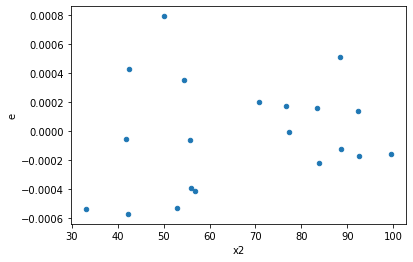

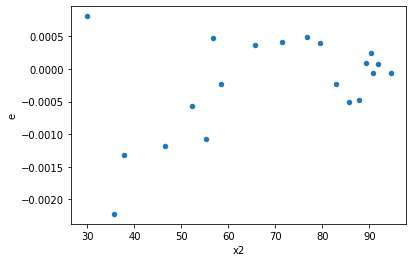

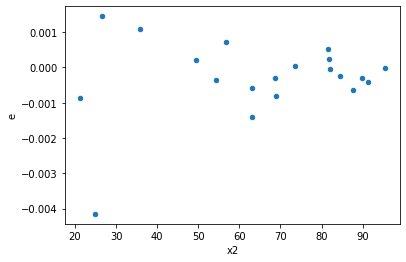

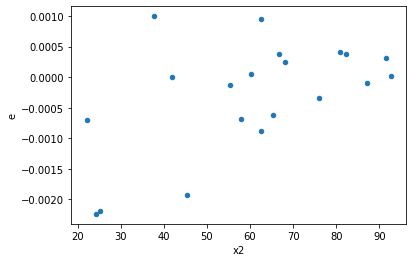

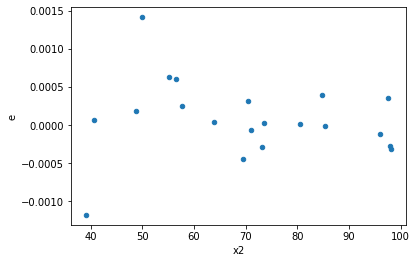

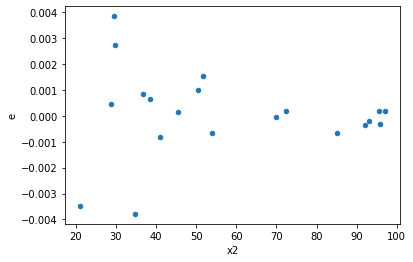

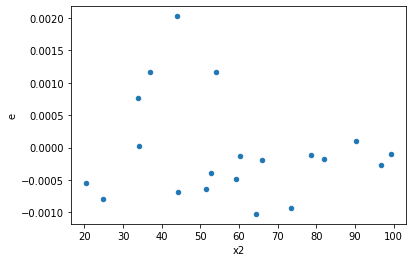

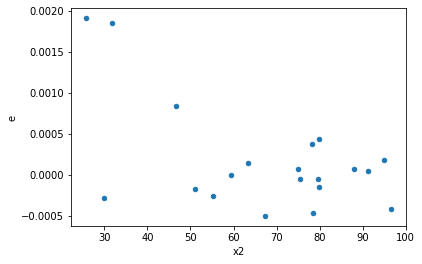

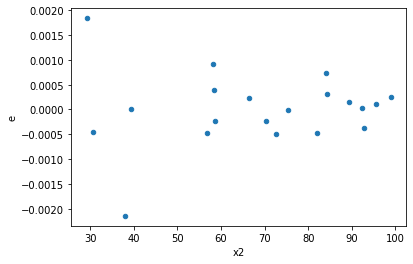

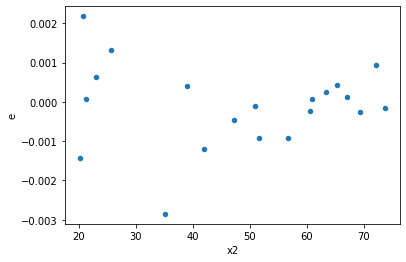

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,5.0,1.741497211355428e-05,2.215297571673889e-05,1.934996901506031e-06,4.4305951433477784e-06,2.2897169188743374,0.37482484270927663,0.8125875786453617,0.18741242135463831,Reject005=1 : Homoscedasticity
2.0,8.0,6.0,3.131665838793156e-06,4.832076646348534e-06,3.914582298491445e-07,8.053461077247556e-07,2.057297679078328,0.39497032901717444,0.8025148354914128,0.19748516450858722,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,2.8787479397778994e-06,4.085599526077157e-06,4.1124970568255706e-07,5.836570751538796e-07,1.4192279461578592,0.6556918534623093,0.6721540732688454,0.32784592673115465,Reject005=1 : Homoscedasticity
10.0,4.0,10.0,1.7541336824633563e-07,7.495442561877256e-07,4.3853342061583906e-08,7.495442561877255e-08,1.7092066897321743,0.4479372367938874,0.7760313816030563,0.2239686183969437,Reject005=1 : Homoscedasticity
15.0,5.0,9.0,6.391082493720467e-07,4.678612870201536e-05,1.2782164987440936e-07,5.198458744668374e-06,40.669626387831,1.3039437170903057e-05,0.9999934802814145,6.519718585451528e-06,Reject005=0 : Heteroscedasticity
16.0,7.0,7.0,3.540601060486902e-06,5.894235741989666e-06,5.058001514981289e-07,8.420336774270951e-07,1.6647556844992564,0.5174223219340339,0.741288839032983,0.25871116096701696,Reject005=1 : Homoscedasticity
17.0,9.0,5.0,9.94014979364216e-07,2.930312030005465e-06,1.1044610881824623e-07,5.86062406001093e-07,5.306320089244037,0.08076392029983781,0.9596180398500811,0.040381960149918905,Reject005=1 : Homoscedasticity
18.0,1.0,13.0,8.077935669463161e-28,2.517437903401563e-06,8.077935669463161e-28,1.936490694924279e-07,2.3972593669503353e+20,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
19.0,5.0,9.0,1.034964158851887e-06,1.5242855872018269e-05,2.069928317703774e-07,1.6936506524464744e-06,8.182170551322693,0.007315826417654936,0.9963420867911725,0.003657913208827468,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,1.741497211355428e-05,2.215297571673889e-05,1.934996901506031e-06,4.4305951433477784e-06,2.2897169188743374,0.37482484270927663,Reject005=1 : Homoscedasticity
1.0,9.0,5.0,1.275409758104231e-05,9.414060150501432e-07,1.4171219534491456e-06,1.8828120301002864e-07,0.13286167965415352,0.00975149381558787,Reject005=0 : Heteroscedasticity
2.0,8.0,6.0,3.131665838793156e-06,4.832076646348534e-06,3.914582298491445e-07,8.053461077247556e-07,2.057297679078328,0.39497032901717444,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,1.158497334744317e-05,5.5671149141031255e-06,1.6549961924918815e-06,7.953021305861608e-07,0.48054619955874134,0.3545674909678671,Reject005=1 : Homoscedasticity
4.0,11.0,3.0,2.372309683760702e-05,3.6535522558512594e-07,2.1566451670551836e-06,1.2178507519504197e-07,0.05646968590634445,0.0003209844226503759,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,2.8787479397778994e-06,4.085599526077157e-06,4.1124970568255706e-07,5.836570751538796e-07,1.4192279461578592,0.6556918534623093,Reject005=1 : Homoscedasticity
6.0,3.0,11.0,3.568273953988807e-06,2.4880904731497673e-06,1.1894246513296023e-06,2.2619004301361522e-07,0.1901676098278003,0.1982193393669935,Reject005=1 : Homoscedasticity
7.0,12.0,2.0,6.851123283003696e-06,2.0115633923961447e-07,5.70926940250308e-07,1.0057816961980723e-07,0.1761664453523797,0.03681904993250749,Reject005=0 : Heteroscedasticity
8.0,4.0,10.0,1.2664002721807581e-05,1.1945932490539788e-06,3.1660006804518952e-06,1.1945932490539788e-07,0.037731932795525176,0.006373460759021049,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    566
Reject005=1 : Homoscedasticity      434
Name: Result_test, dtype: int64